<a href="https://colab.research.google.com/github/Chantrey1972/Proyecto-del-M-dulo-4-Modelado-no-supervisado-en-Machine-Learning/blob/main/Entregable_Chantrey_Bruzzo_Duncan_4_de_UDD_Proyecto_M4_Modelado_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

¡Éxito! Te vemos en el contenido del siguiente módulo.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import datetime

from sklearn.preprocessing   import StandardScaler
from sklearn.decomposition   import PCA
from sklearn.cluster         import KMeans
from sklearn.dummy           import DummyClassifier
from sklearn.neighbors       import NearestNeighbors
from sklearn.datasets        import load_digits
from scipy.stats             import pearsonr
from scipy.stats             import skew, kurtosis
from sklearn.metrics         import silhouette_score
from sklearn.metrics         import davies_bouldin_score
from sklearn.metrics         import calinski_harabasz_score
from sklearn.cluster         import AgglomerativeClustering
import scipy.cluster.hierarchy as hc

import warnings
warnings.filterwarnings("ignore", message= "attempting to set identical")
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1= pd.read_csv ("/content/drive/MyDrive/UDD CIENCIAS DE DATOS/MODULO 4 MODELOS NO SUPERVISADOS/DATA/costumers.csv")

# EDA

In [ ]:
df1.head(5)

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [ ]:
list(df1.columns)

['Salario',
 'Credito_tipo_1',
 'Credito_tipo_2',
 'Limite_TC',
 'Tiempo_cliente',
 'Producto_ofrecido']

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Salario,500.0,12089.09738,5123.700116,-2911.65,8534.350,11438.600,15171.4675,30041.40
Credito_tipo_1,500.0,0.61000,0.488238,0.00,0.000,1.000,1.0000,1.00
Credito_tipo_2,500.0,0.45800,0.498732,0.00,0.000,0.000,1.0000,1.00
Limite_TC,500.0,44784.55496,22150.923996,-22207.95,30096.285,47991.515,59108.1750,118636.82
Tiempo_cliente,500.0,4.32700,4.784776,0.00,0.000,0.000,8.4000,19.30
Producto_ofrecido,500.0,0.60200,0.489976,0.00,0.000,1.000,1.0000,1.00


In [ ]:
print(f"el porcentaje de completitud es: {df1.count().sum() / df1.size * 100:.2f}%")

el porcentaje de completitud es: 100.00%


In [ ]:
duplicados = df1[df1.duplicated()]
print ("el numero de duplicados es:", duplicados.shape)

el numero de duplicados es: (0, 6)


In [ ]:
total_dupli = duplicados.shape[0]
print(f" - Tenemos {total_dupli} filas duplicadas en nuestra data")
colum_dupli = df1.columns[df1.columns.duplicated(keep=False)]
if any(colum_dupli):
  print(f"las columnas duplicadas son: {list(colum_dupli)}")
else:
  print(" - No hay columnas duplicadas en nuestra data")

 - Tenemos 0 filas duplicadas en nuestra data
 - No hay columnas duplicadas en nuestra data


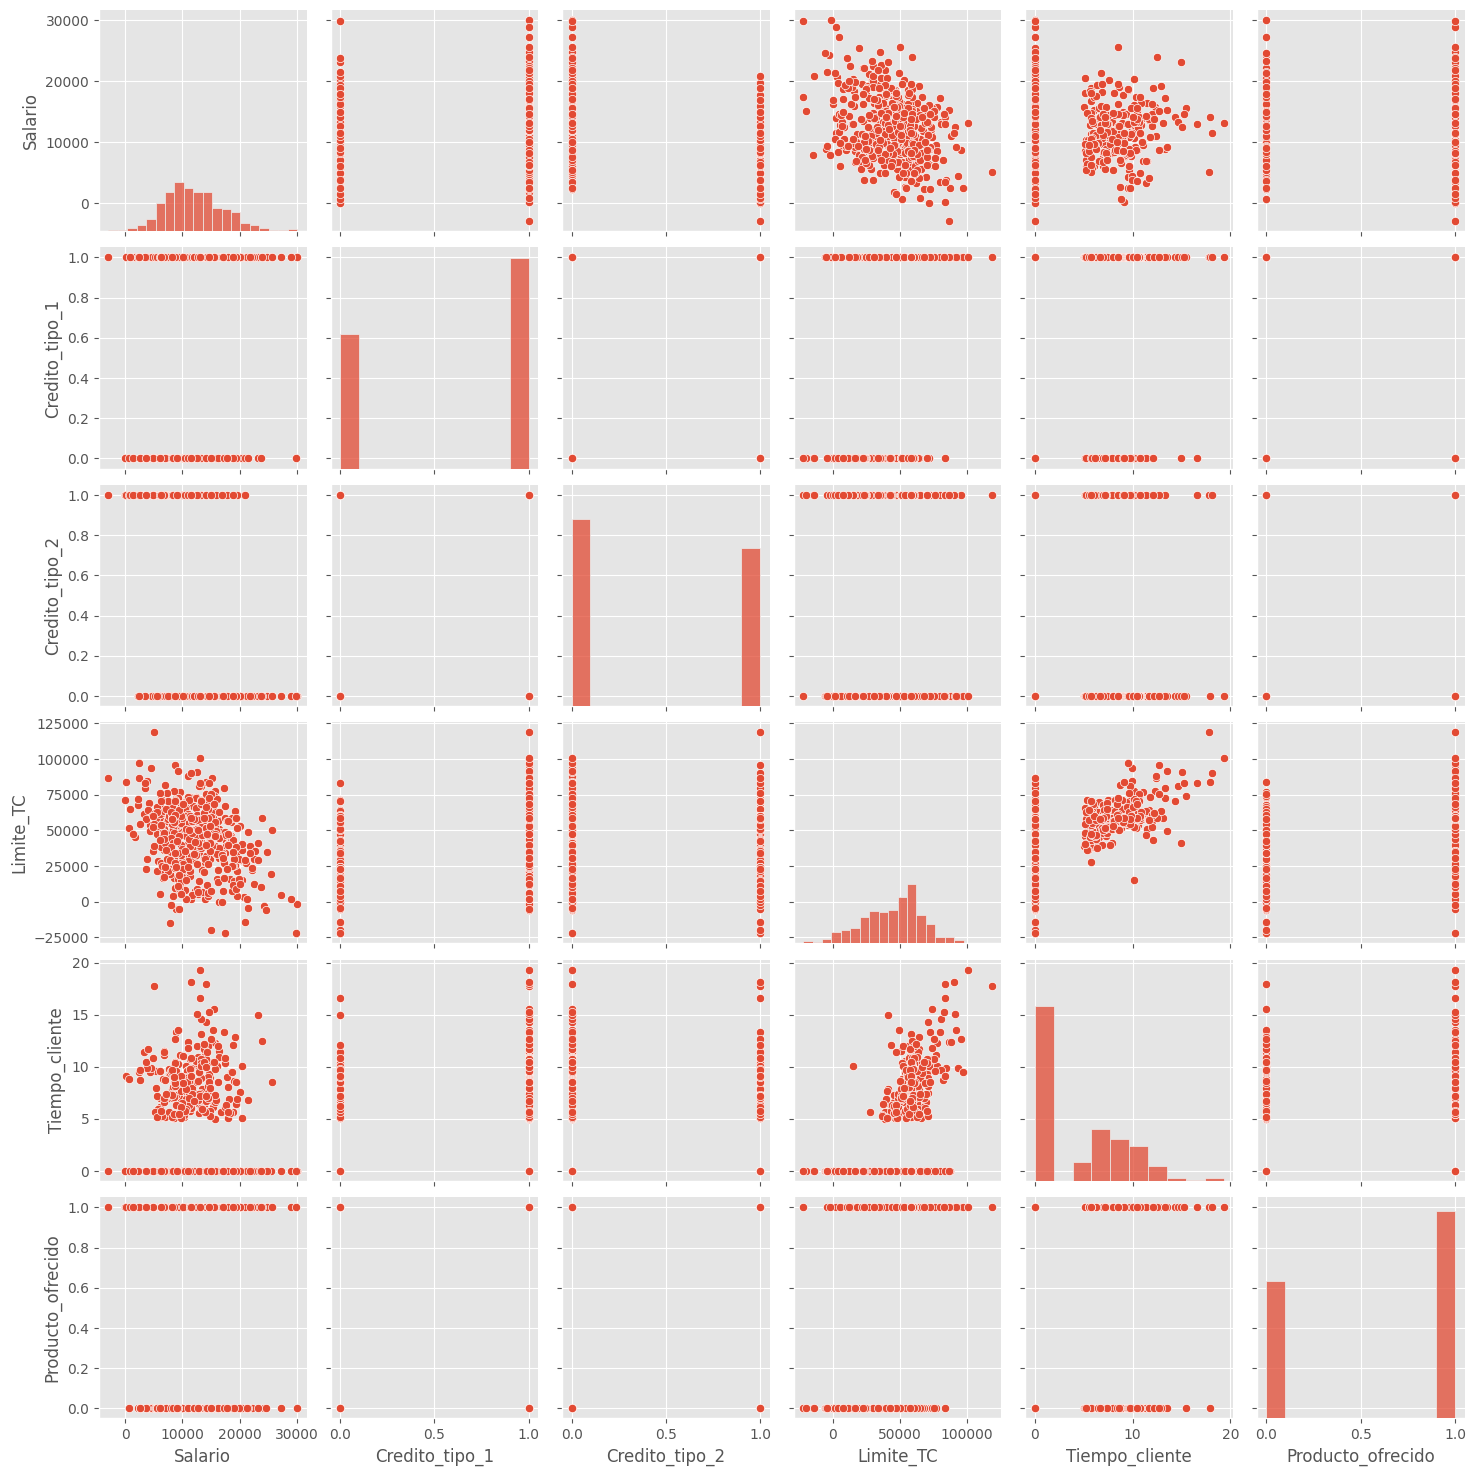

In [ ]:
sns.pairplot(df1, palette= "Red")
plt.show();

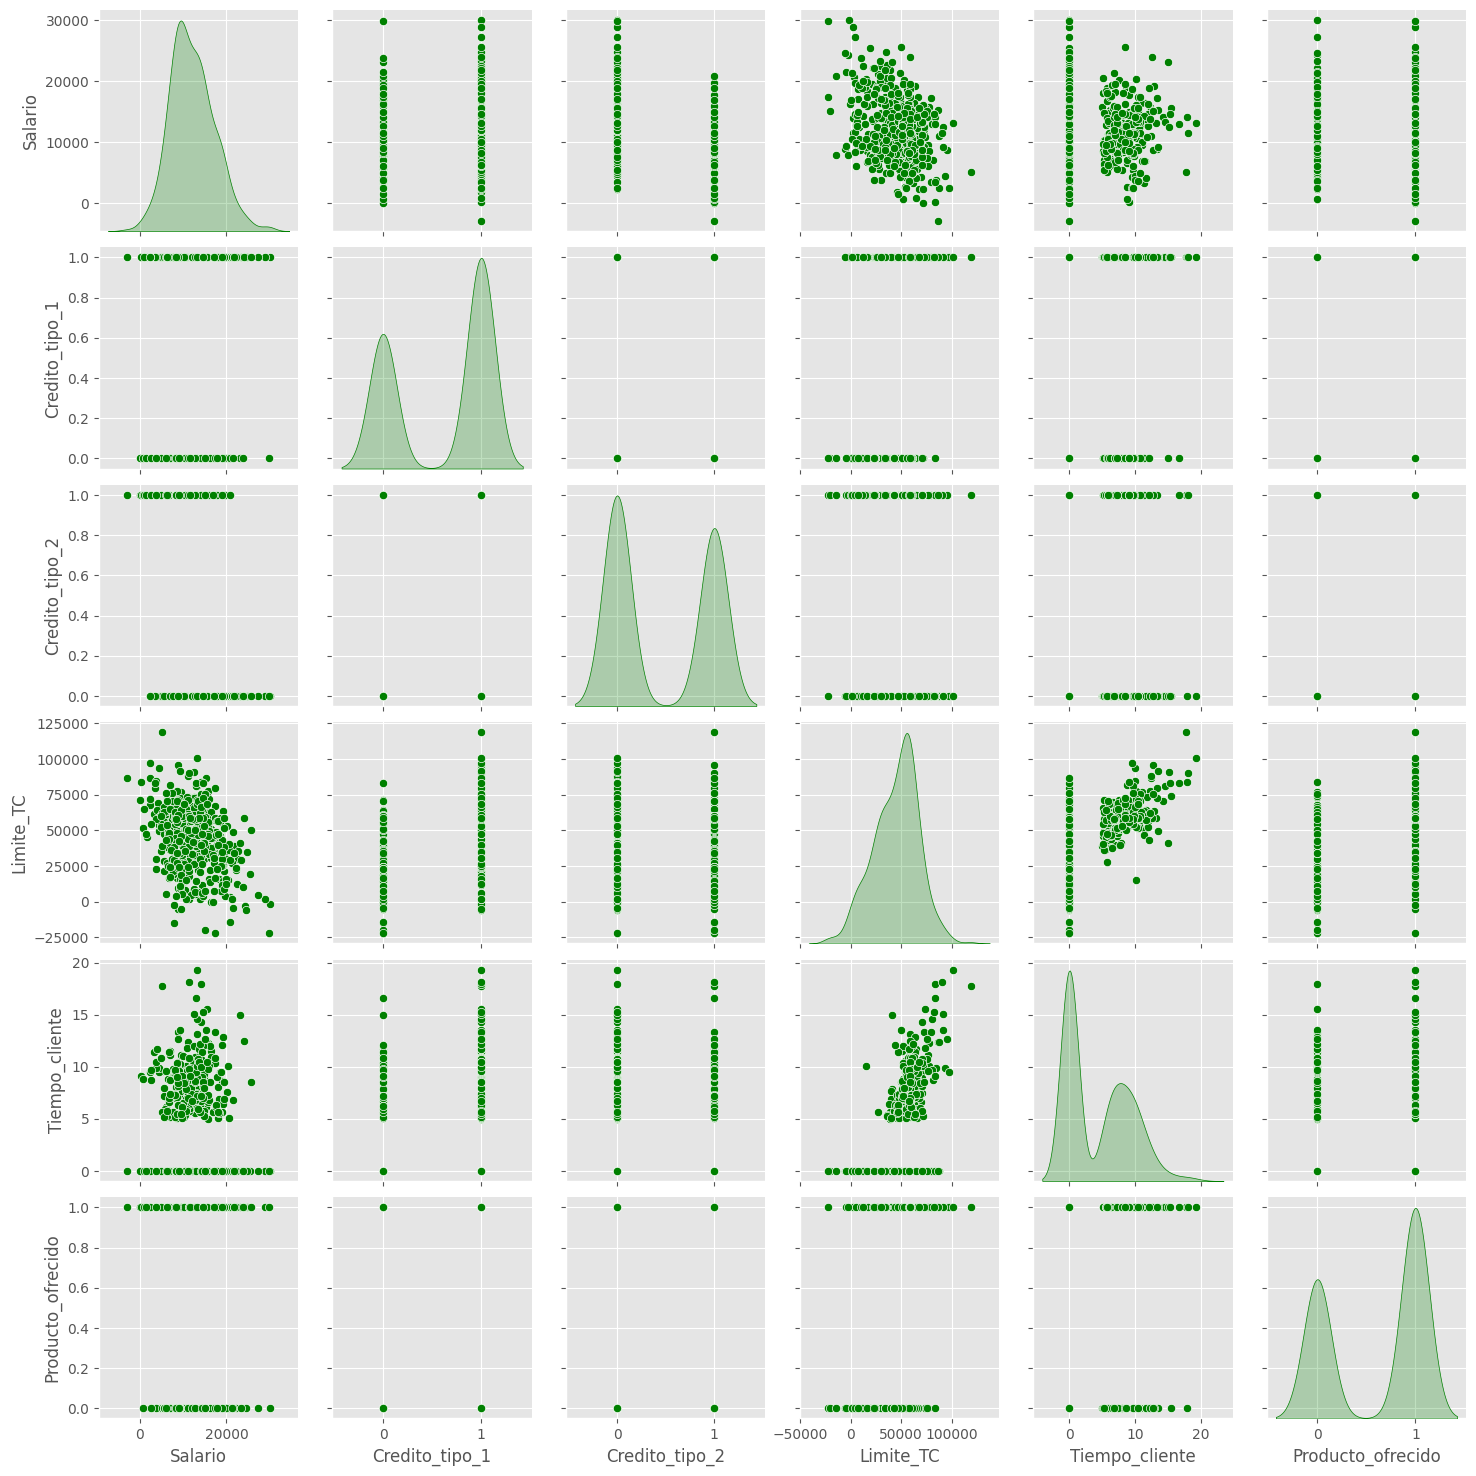

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df1 es tu DataFrame
sns.pairplot(df1, diag_kind='kde', plot_kws={'color': 'green'}, diag_kws={'color': 'green'})
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

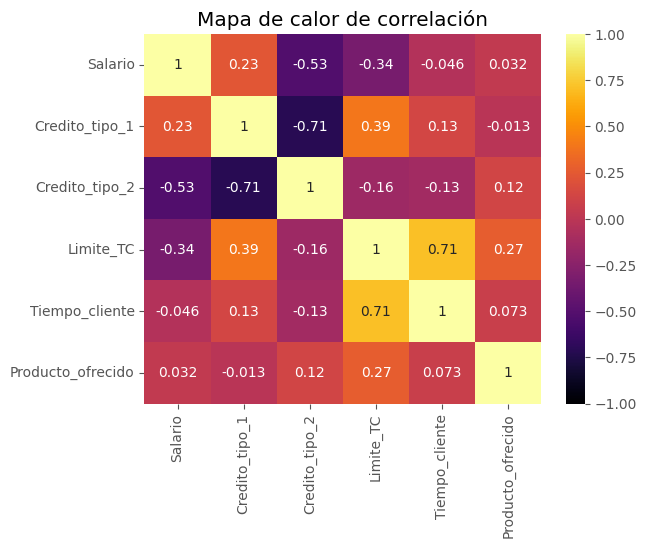

In [ ]:
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1 , cmap='inferno');
plt.title('Mapa de calor de correlación')
plt.show

In [ ]:
df1["Credito_tipo_1"].value_counts()

,count
Credito_tipo_1,
1,305
0,195


In [ ]:
df1['Credito_tipo_2'].value_counts()

,count
Credito_tipo_2,
0,271
1,229


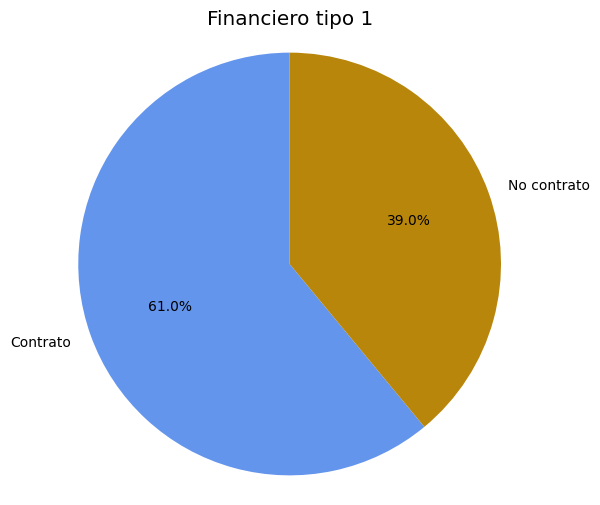

In [ ]:
contratados = df1["Credito_tipo_1"].sum()
no_contratados = len(df1) - contratados
sizes = [contratados, no_contratados]
labels = ['Contrato', 'No contrato']
colors = ["cornflowerblue", 'darkgoldenrod']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Financiero tipo 1')
plt.show()


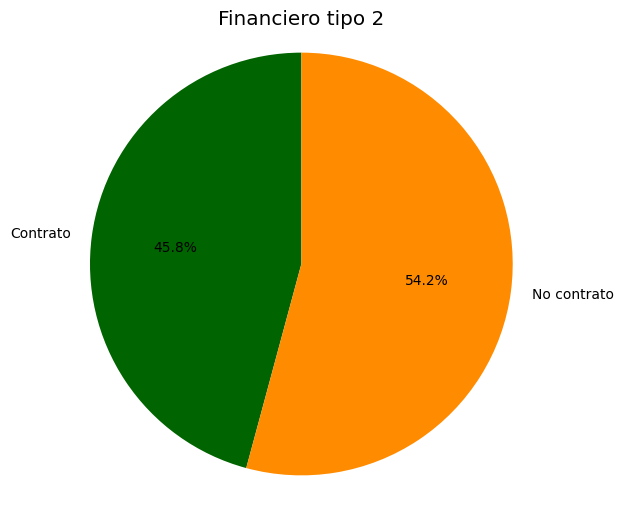

In [ ]:
contratados = df1["Credito_tipo_2"].sum()
no_contratados = len(df1) - contratados
sizes = [contratados, no_contratados]
labels = ['Contrato', 'No contrato']
colors = ["darkgreen", 'darkorange']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Financiero tipo 2')
plt.show()

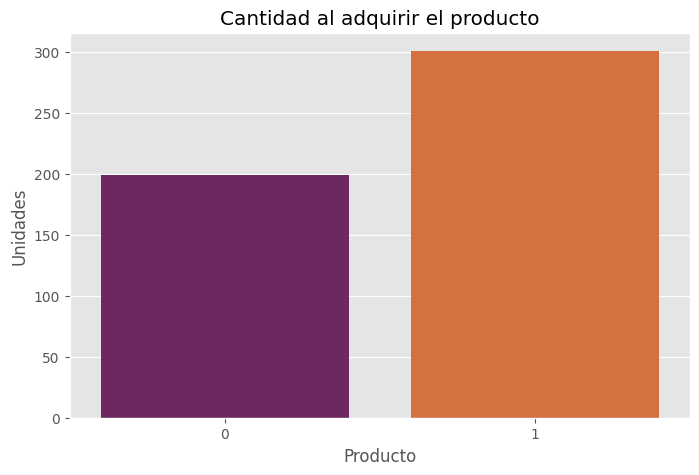

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df1, x="Producto_ofrecido", palette="inferno")
plt.title("Cantidad al adquirir el producto")
plt.xlabel("Producto")
plt.ylabel("Unidades")
plt.show()

# OUTLIERS

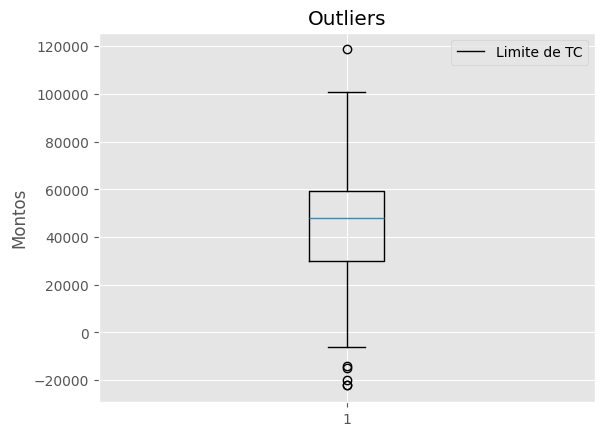

In [ ]:
plt.boxplot(df1["Limite_TC"])
plt.title("Outliers")
plt.ylabel("Montos")
legend_label= ["Limite de TC"]
plt.legend(legend_label,loc="best", fontsize=10)
plt.show();

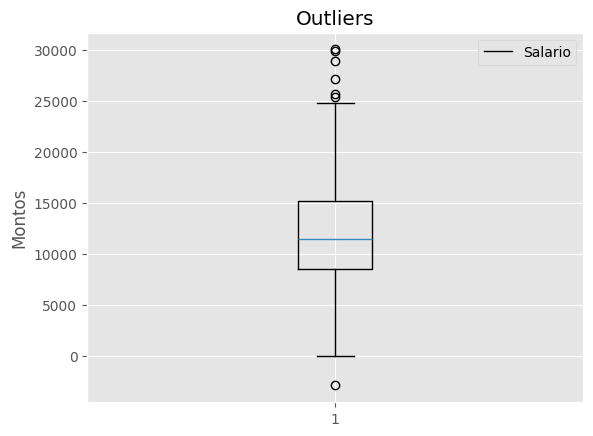

In [ ]:
plt.boxplot(df1["Salario"])
plt.title("Outliers")
plt.ylabel("Montos")
legend_label= ["Salario"]
plt.legend(legend_label,loc="best", fontsize=10)
plt.show();

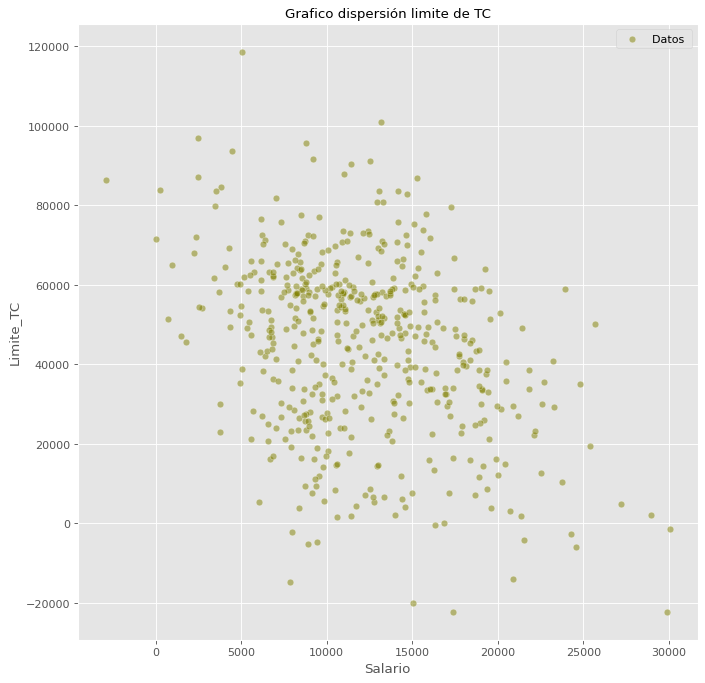

In [ ]:
plt.figure(figsize=(10, 10), dpi=80)
sns.scatterplot(x=df1["Salario"], y=df1["Limite_TC"], c="olive", alpha=0.5)
plt.title("Grafico dispersión limite de TC", fontsize=12)
plt.xlabel("Salario", fontsize=12)
plt.ylabel("Limite_TC", fontsize=12)
legend_label=["Datos "]
plt.legend(legend_label,loc="best", fontsize=10)
plt.show();


In [ ]:
from scipy.stats import skew, kurtosis
data=df1["Limite_TC"]
skewness = skew(data)
kurtosis= kurtosis(data)
if abs(skewness)< 0.5 and abs (kurtosis)< 0.5:
  print("la distribucion es simétrica")
else:
  print("la distribucion no es simétrica")

la distribucion es simétrica


In [ ]:
from scipy.stats import skew, kurtosis

data=df1["Salario"]
skewness = skew(data)
kurt_value = kurtosis(data)
if abs(skewness)< 0.5 and abs (kurt_value)< 0.5:
  print("la distribucion es simétrica")
else:
  print("la distribucion no es simétrica")

la distribucion es simétrica


In [ ]:
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
k = 3
neighbors_model = NearestNeighbors(n_neighbors=k)
neighbors_model.fit(df1)
distances, indices = neighbors_model.kneighbors(df1)
max_distances = distances[:,-1]
threshold = max_distances.mean() + 2 * max_distances.std()
outliers_indices  = df1.index[max_distances > threshold]
df1.drop(outliers_indices, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            486 non-null    float64
 1   Credito_tipo_1     486 non-null    int64  
 2   Credito_tipo_2     486 non-null    int64  
 3   Limite_TC          486 non-null    float64
 4   Tiempo_cliente     486 non-null    float64
 5   Producto_ofrecido  486 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 26.6 KB


Estandarización

In [ ]:
scaler= StandardScaler()
scaler

StandardScaler()

Entrenamiento

In [ ]:
df1[df1.columns] = scaler.fit_transform(df1[df1.columns])

In [ ]:
df1.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,2.212750,0.801182,-0.920820,-0.728262,-0.917431,0.811605
1,-0.277164,0.801182,1.085989,0.409941,-0.917431,0.811605
2,-0.387506,-1.248157,1.085989,-1.309852,-0.917431,-1.232126
3,0.401695,0.801182,-0.920820,-0.694582,-0.917431,0.811605
4,-1.123873,-1.248157,1.085989,-1.189147,-0.917431,-1.232126


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            486 non-null    float64
 1   Credito_tipo_1     486 non-null    float64
 2   Credito_tipo_2     486 non-null    float64
 3   Limite_TC          486 non-null    float64
 4   Tiempo_cliente     486 non-null    float64
 5   Producto_ofrecido  486 non-null    float64
dtypes: float64(6)
memory usage: 26.6 KB


In [ ]:
x = df1[["Salario", "Credito_tipo_1", "Credito_tipo_2", "Limite_TC","Tiempo_cliente","Producto_ofrecido"]]
x

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,2.212750,0.801182,-0.920820,-0.728262,-0.917431,0.811605
1,-0.277164,0.801182,1.085989,0.409941,-0.917431,0.811605
2,-0.387506,-1.248157,1.085989,-1.309852,-0.917431,-1.232126
3,0.401695,0.801182,-0.920820,-0.694582,-0.917431,0.811605
4,-1.123873,-1.248157,1.085989,-1.189147,-0.917431,-1.232126
...,...,...,...,...,...,...
494,-0.742486,-1.248157,1.085989,-1.996919,-0.917431,-1.232126
495,-0.598622,-1.248157,1.085989,-0.130103,-0.917431,-1.232126
497,0.637561,-1.248157,1.085989,-1.814268,-0.917431,-1.232126
498,1.083853,0.801182,-0.920820,-0.709861,-0.917431,0.811605


# REDUCCIÓN DE PCA

In [ ]:
pca= PCA()
pca.fit(x)
pca.explained_variance_ratio_

array([0.36266004, 0.29542489, 0.16956658, 0.12184638, 0.03205834,
       0.01844375])

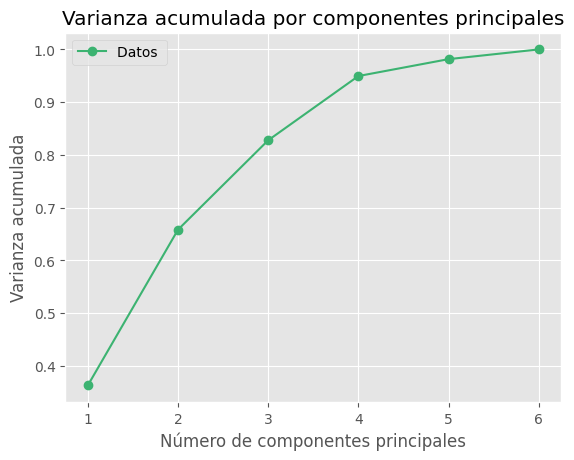

In [ ]:
pca= PCA()
pca.fit(x)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-', color="mediumseagreen")
plt.title("Varianza acumulada por componentes principales")
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.legend(['Componentes Principales'])
plt.legend(legend_label, loc="best", fontsize=10)
plt.show();

In [ ]:
pca= PCA(n_components=2)
pca.fit(x)
x_pca= pca.transform(x)
x_pca

array([[ 9.57732110e-01, -2.20369856e+00],
       [-3.57320036e-01,  3.88256426e-01],
       [-2.32126146e+00, -7.24230440e-01],
       [ 4.87452572e-01, -1.26704051e+00],
       [-2.46820817e+00, -2.83127554e-01],
       [ 2.09011237e+00,  5.84351386e-01],
       [ 2.38224220e+00,  1.24978281e+00],
       [-1.15116516e+00,  1.43732818e+00],
       [ 1.72719227e+00,  1.86718693e-01],
       [ 1.30146688e+00,  1.88775592e-02],
       [-2.42439667e+00, -1.57467319e+00],
       [-8.94290525e-01,  2.82722333e+00],
       [ 4.62879079e-01, -1.88006742e+00],
       [-2.43321036e+00,  2.68823235e-01],
       [ 1.98830050e+00, -1.63224703e-01],
       [ 6.72753446e-01, -3.47931919e-02],
       [-7.80709733e-01,  1.59550782e+00],
       [ 7.12114124e-01, -2.86957798e+00],
       [-2.79784533e+00, -6.44985311e-01],
       [-1.76253969e+00,  6.02336104e-01],
       [-1.14775033e+00,  1.35353506e+00],
       [-2.36425430e+00, -8.55086552e-01],
       [ 1.69905365e+00,  1.06888419e-01],
       [ 1.

In [ ]:
len(x_pca)

486

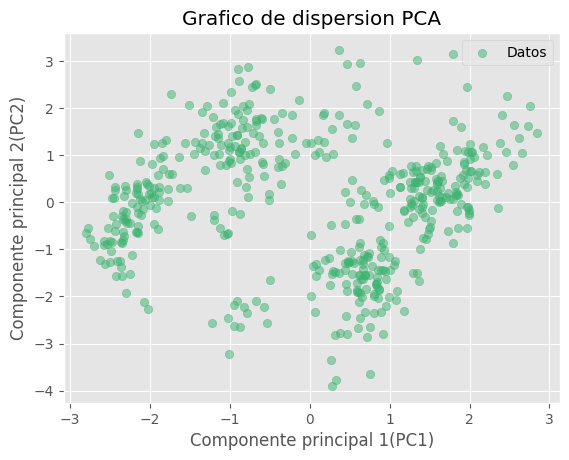

In [ ]:
pca_feature1= x_pca[:,0]
pca_feature2= x_pca[:,1]
plt.scatter(pca_feature1,pca_feature2, c="mediumseagreen", alpha=0.5)
plt.title("Grafico de dispersion PCA")
plt.xlabel("Componente principal 1(PC1)")
plt.ylabel("Componente principal 2(PC2)")
legend_label=["Datos"]
plt.legend(legend_label,loc="best", fontsize=10)
plt.show();


# METODO DEL CODO

In [ ]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x_pca)
    inertia.append(kmeans.inertia_)

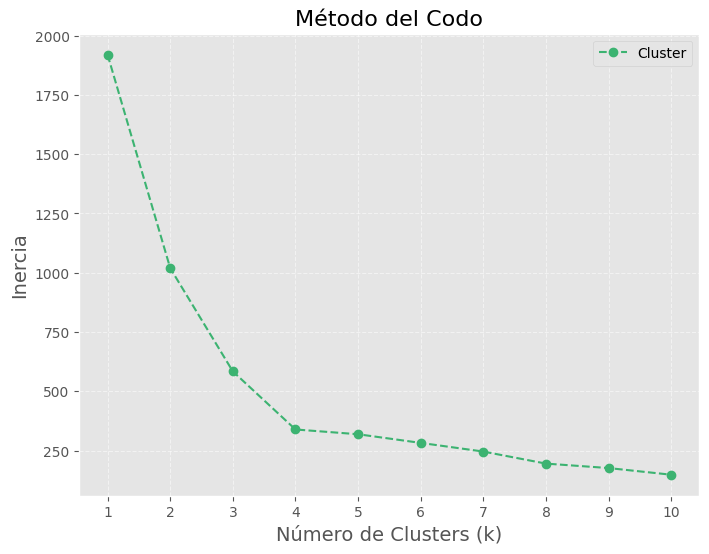

El Numero optimo de Cluster es 4


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='mediumseagreen')
plt.title('Método del Codo', fontsize=16)
plt.xlabel('Número de Clusters (k)', fontsize=14)
plt.ylabel('Inercia', fontsize=14)
legend_label=["Cluster"]
plt.legend(legend_label,loc="best", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(1, 11))
plt.show()
print("El Numero optimo de Cluster es 4")

# KMEANS

In [ ]:
from sklearn.cluster import KMeans
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init="k-means++", max_iter=300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(x_pca)

In [ ]:
y_kmeans

array([2, 3, 0, 2, 0, 1, 1, 3, 1, 1, 0, 3, 2, 0, 1, 1, 3, 2, 0, 0, 3, 0,
       1, 2, 1, 2, 1, 3, 0, 0, 2, 1, 0, 0, 2, 1, 3, 2, 3, 2, 1, 0, 1, 2,
       2, 2, 2, 3, 3, 1, 3, 0, 0, 1, 1, 1, 1, 1, 0, 2, 3, 1, 2, 1, 3, 0,
       0, 2, 1, 0, 1, 3, 1, 3, 1, 2, 2, 2, 2, 0, 1, 1, 3, 0, 1, 2, 2, 1,
       0, 1, 3, 1, 1, 2, 2, 0, 2, 1, 2, 1, 3, 3, 2, 0, 3, 1, 0, 3, 2, 1,
       0, 1, 1, 2, 1, 2, 3, 1, 0, 0, 0, 3, 2, 0, 3, 0, 1, 3, 2, 3, 0, 3,
       0, 2, 1, 0, 1, 2, 1, 3, 3, 2, 3, 0, 2, 3, 1, 1, 2, 1, 3, 2, 0, 1,
       3, 3, 1, 2, 1, 2, 1, 0, 3, 3, 2, 0, 3, 1, 3, 2, 2, 0, 0, 2, 2, 3,
       0, 1, 3, 1, 3, 1, 1, 1, 3, 3, 0, 3, 3, 3, 1, 3, 0, 2, 2, 3, 2, 0,
       2, 1, 3, 3, 2, 3, 1, 2, 2, 2, 3, 0, 3, 1, 2, 1, 3, 1, 1, 1, 0, 1,
       1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 3, 0, 1, 3, 3, 3, 0, 1, 3, 2, 3, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 3, 2, 0, 3, 3, 2, 0, 1, 0, 3, 3, 1, 1, 1,
       1, 0, 1, 3, 0, 1, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 3, 0, 2, 1, 1,
       1, 2, 1, 3, 3, 0, 1, 2, 1, 2, 2, 3, 1, 0, 0,

In [ ]:
np.unique(y_kmeans, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([100, 148, 116, 122]))

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
cluster_labels = model.fit_predict(x_pca)
print(cluster_labels)

[2 1 3 2 3 0 0 1 0 0 3 1 2 3 0 0 1 2 3 3 1 3 0 2 0 2 0 1 3 3 2 0 3 3 2 0 1
 2 1 2 0 3 0 2 2 2 2 1 1 0 1 3 3 0 0 0 0 0 3 2 1 0 2 0 1 3 3 2 0 3 0 1 0 1
 0 2 2 2 2 3 0 0 1 3 0 2 2 0 3 0 1 0 0 2 2 3 2 0 2 0 1 1 2 3 1 0 3 1 2 0 3
 0 0 2 0 2 1 0 3 3 3 1 2 3 1 3 0 1 2 1 3 1 3 2 0 3 0 2 0 1 1 2 1 3 2 1 0 0
 2 0 1 2 3 0 1 1 0 2 0 2 0 3 1 0 2 3 1 0 1 2 2 3 3 2 2 1 3 0 1 0 1 0 0 0 1
 1 3 1 1 1 0 1 3 2 2 1 2 3 2 0 1 1 2 1 0 2 2 2 1 3 1 0 2 0 1 0 0 0 3 0 0 3
 2 3 3 2 0 0 0 3 1 3 0 1 1 1 3 0 1 2 1 2 0 0 2 0 0 0 0 2 0 2 3 1 1 2 3 0 3
 1 1 0 0 0 0 3 0 1 3 0 1 2 2 2 3 3 3 3 2 1 0 1 3 2 0 0 0 2 0 1 1 3 0 2 0 2
 2 1 0 3 3 1 1 3 2 3 2 3 2 3 2 3 2 0 1 0 0 2 1 1 0 2 0 2 2 1 0 1 0 0 0 1 3
 1 2 2 1 1 1 1 3 0 0 3 1 2 0 0 2 0 2 1 2 0 0 2 3 0 3 1 0 0 0 3 1 1 2 3 3 2
 0 2 1 1 3 2 1 3 2 1 0 2 3 0 0 3 3 3 1 2 2 1 0 1 0 0 1 1 0 1 1 1 2 0 2 1 1
 3 3 2 0 3 1 2 1 3 0 3 2 0 0 0 0 1 0 2 2 2 0 1 0 1 0 1 2 1 1 1 3 2 3 3 0 1
 3 1 0 1 2 2 0 0 0 0 1 2 3 0 2 1 0 3 1 2 0 0 2 3 0 1 0 1 0 3 2 1 1 0 2 2 0
 3 3 3 2 0]


In [ ]:
import pandas as pd
df1 = pd.DataFrame(x_pca, columns=["Columna_1", "Columna_2"])
df1["Cluster"] = cluster_labels
df1.head(10)

,Columna_1,Columna_2,Cluster
0,0.957732,-2.203699,2
1,-0.357320,0.388256,1
2,-2.321261,-0.724230,3
3,0.487453,-1.267041,2
4,-2.468208,-0.283128,3
5,2.090112,0.584351,0
6,2.382242,1.249783,0
7,-1.151165,1.437328,1
8,1.727192,0.186719,0
9,1.301467,0.018878,0


In [ ]:
import pandas as pd
centers = model.cluster_centers_
center_coord = pd.DataFrame(centers)
center_coord

,0,1
0,1.610104,0.443972
1,-0.728575,1.429012
2,0.488138,-1.775447
3,-2.121032,-0.338934


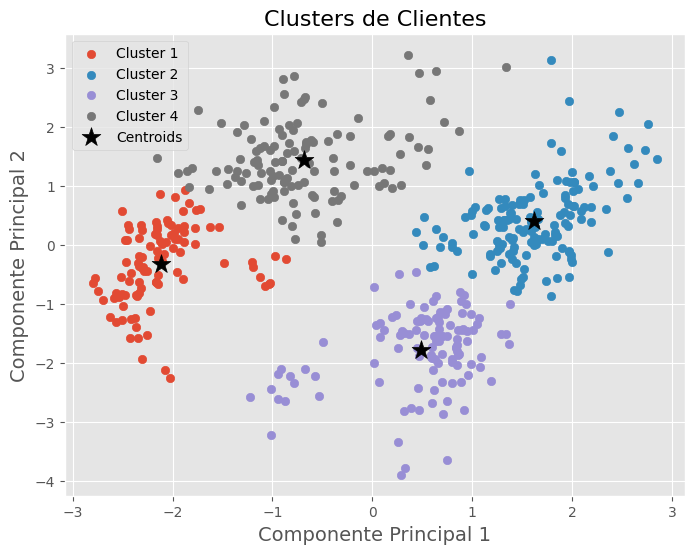

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for i in np.unique(y_kmeans):
    plt.scatter(x_pca[y_kmeans == i, 0], x_pca[y_kmeans == i, 1], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='*', label='Centroids')
plt.title('Clusters de Clientes', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.legend()
plt.show()


In [ ]:
df1.columns

Index(['Columna_1', 'Columna_2', 'Cluster'], dtype='object')

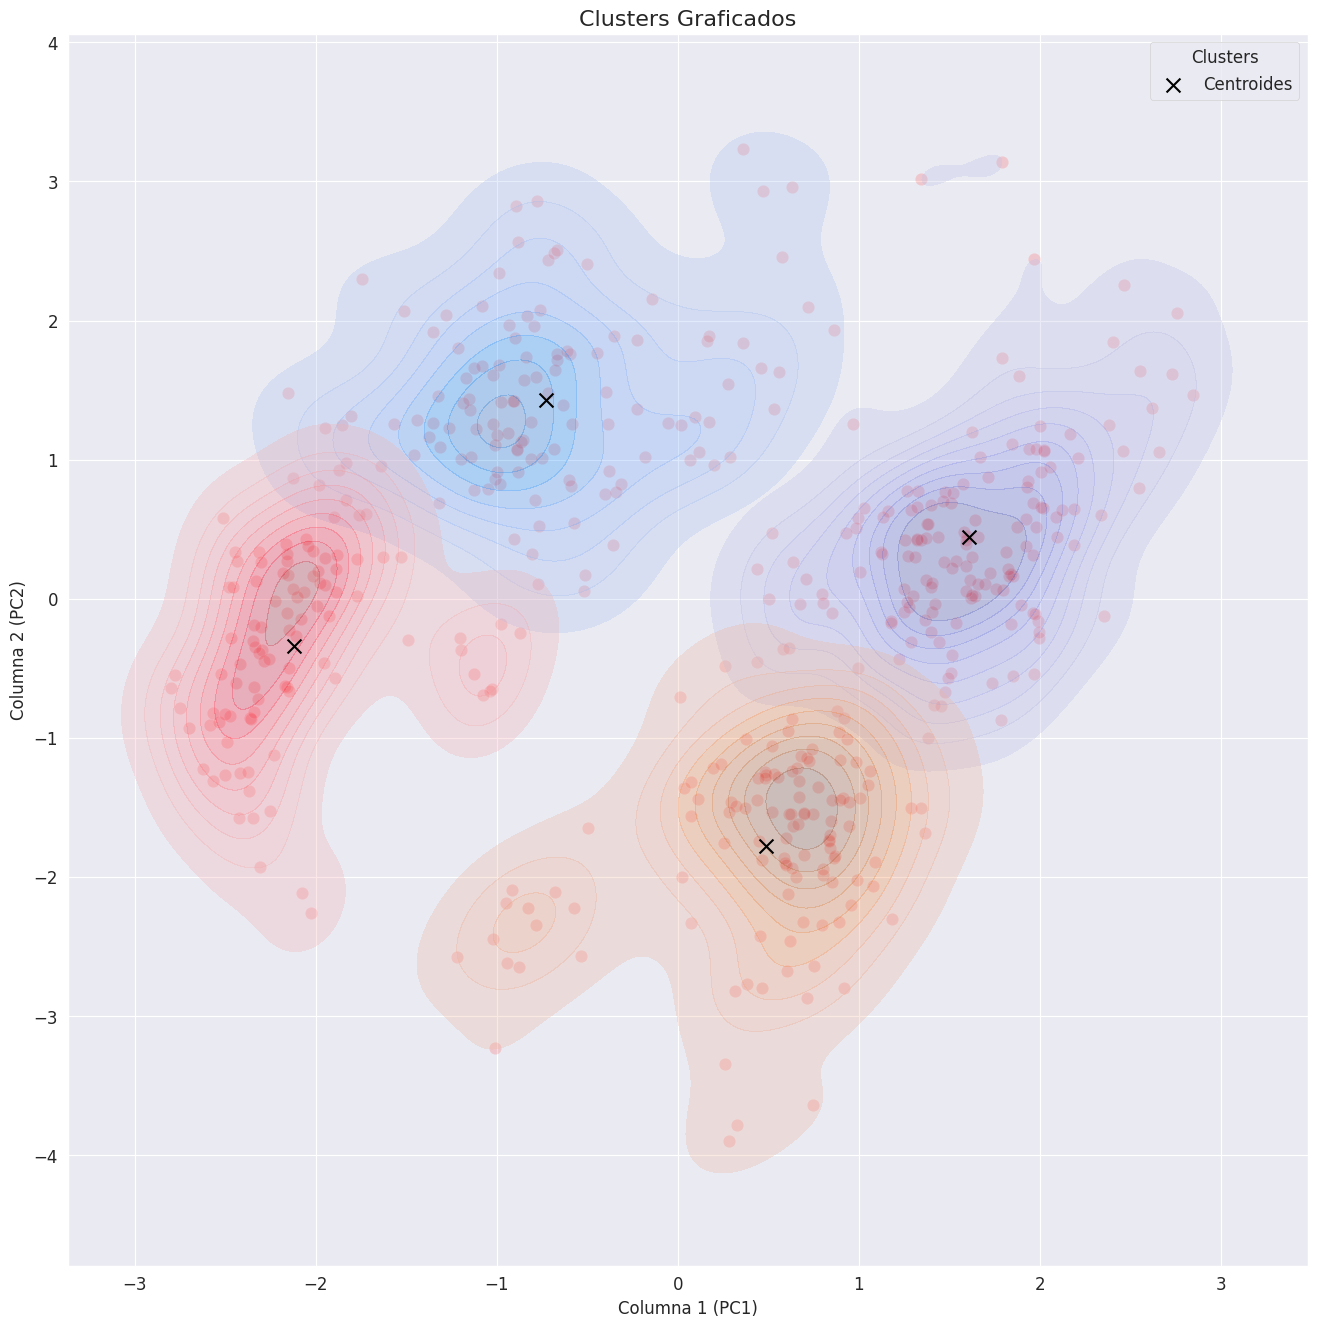

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 16))
sns.scatterplot(data=df1, x="Columna_1", y="Columna_2",
                color="red", alpha=0.15, s=80)
sns.kdeplot(data=df1, x="Columna_1", y="Columna_2", hue="Cluster",
            fill=True, alpha=0.3, palette="coolwarm")
plt.scatter(center_coord[0], center_coord[1], s=100, marker="x",
            c="black", label="Centroides")
sns.set_style("darkgrid")
plt.title("Clusters Graficados", fontsize=16)
plt.xlabel("Columna 1 (PC1)", fontsize=12)
plt.ylabel("Columna 2 (PC2)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Clusters", fontsize=12, title_fontsize=12)
plt.show()


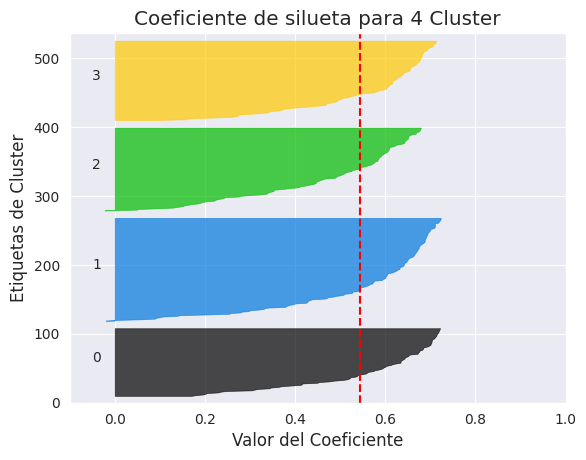


Numero de Cluster = 4, Coeficiente de silueta promedio= 0.5430785564608395


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib import cm

x= x_pca
range_n_clusters= [4]
for n_clusters in range_n_clusters:
    clusterer= KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels= clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    fig, ax1 = plt.subplots(1,1)
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("Coeficiente de silueta para 4 Cluster")
    ax1.set_xlabel("Valor del Coeficiente")
    ax1.set_ylabel("Etiquetas de Cluster")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show();
    print()
    print(f"Numero de Cluster = {n_clusters}, Coeficiente de silueta promedio= {silhouette_avg}")

# METRICAS

In [ ]:
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
print ("      SCORING PARA 4 CLUSTER    ")
print ("------------------------------------")
print ("/   Coeficiente    -    valor     /")
print ("------------------------------------")
silhouette_avg = silhouette_score(x_pca, y_kmeans, metric="euclidean")
print (f"Silhouette Score: {silhouette_avg}")
davies_bouldin_index = davies_bouldin_score(x_pca, y_kmeans)
print (f"Davies-Bouldin Index: {davies_bouldin_index}")
ch_score= calinski_harabasz_score(x_pca, y_kmeans)
print (f"Calinski-Harabasz Index: {ch_score}")

      SCORING PARA 4 CLUSTER    
------------------------------------
/   Coeficiente    -    valor     /
------------------------------------
Silhouette Score: 0.5432705036820951
Davies-Bouldin Index: 0.6057455807740482
Calinski-Harabasz Index: 748.7512726476591





# Análisis de los coeficientes de clustering

**Silhouette Score (0.54):** Este valor indica que hay una separación moderada entre los clusters. Los datos dentro de un cluster son bastante similares, aunque puede haber cierta superposición con otros clusters.

**Davies-Bouldin Index (0.60):** Este índice sugiere una separación moderada entre los clusters. Un valor más bajo indicaría que los clusters están más definidos y separados.

**Calinski-Harabasz Index (748.75):** Este índice señala una buena separación entre los clusters. Un valor alto sugiere que los clusters están bien separados y tienen poca varianza interna.

- En general, los resultados indican que el algoritmo de clustering ha logrado identificar grupos relativamente bien definidos en los datos. Sin embargo, el hecho de que los índices no sean extremadamente altos sugiere que hay margen para mejorar.


**Silhouette Score:** Si un cliente nuevo se encuentra en una zona de solapamiento entre dos clusters, podría ser complicado asignarlo con alta confianza a un grupo específico.

**Davies-Bouldin**: Una puntuación más baja en este índice indicaría que los centros de los clusters están más distanciados entre sí, lo que facilita la diferenciación entre grupos.

**Calinski-Harabasz:** Un índice alto indica que los datos dentro de cada cluster son muy similares, lo cual es deseable en muchos casos.

**Recomendaciones**

Usar los grupos para estrategias de marketing dirigidas:

Los resultados indican que hemos identificado segmentos claros de clientes. Esto significa que cada grupo tiene características distintas que podemos utilizar para diseñar campañas personalizadas, optimizando el presupuesto de marketing.

 Sin embargo, se recomienda actualizar periódicamente este análisis para reflejar cambios en el comportamiento de los clientes.

- # 2DA PARTE

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/UDD CIENCIAS DE DATOS/MODULO 4 MODELOS NO SUPERVISADOS/DATA/new_costumer.csv")

In [ ]:
df2.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            50 non-null     float64
 1   Credito_tipo_1     50 non-null     int64  
 2   Credito_tipo_2     50 non-null     int64  
 3   Limite_TC          50 non-null     float64
 4   Tiempo_cliente     50 non-null     float64
 5   Producto_ofrecido  50 non-null     int64  
 6   Tipo_de_cliente    50 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.9 KB


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Salario,50.0,13232.1144,5767.078320,-638.96,9783.8875,12849.835,16788.6725,23890.65
Credito_tipo_1,50.0,0.5200,0.504672,0.00,0.0000,1.000,1.0000,1.00
Credito_tipo_2,50.0,0.5000,0.505076,0.00,0.0000,0.500,1.0000,1.00
Limite_TC,50.0,38422.6698,20240.655015,-2756.45,22922.6175,39054.305,52052.3200,83578.93
Tiempo_cliente,50.0,2.9440,3.973338,0.00,0.0000,0.000,6.3500,11.30
Producto_ofrecido,50.0,0.7000,0.462910,0.00,0.0000,1.000,1.0000,1.00
Tipo_de_cliente,50.0,1.3800,1.122861,0.00,0.0000,1.000,2.0000,3.00


In [ ]:
print(f"el porcentaje de completitud es: {df2.count().sum() / df2.size * 100:.2f}%")

el porcentaje de completitud es: 100.00%


- DUPLICADOS

In [ ]:
duplicados = df2[df2.duplicated()]
print ("el numero de duplicados es:", duplicados.shape)

el numero de duplicados es: (0, 7)


In [ ]:
total_dupli = duplicados.shape[0]
print(f" - Tenemos {total_dupli} filas duplicadas en nuestra data")
colum_dupli = df2.columns[df2.columns.duplicated(keep=False)]
if any(colum_dupli):
  print(f"las columnas duplicadas son: {list(colum_dupli)}")
else:
  print(" - No hay columnas duplicadas en nuestra data")

 - Tenemos 0 filas duplicadas en nuestra data
 - No hay columnas duplicadas en nuestra data


- CORRELACIÓN

<function matplotlib.pyplot.show(close=None, block=None)>

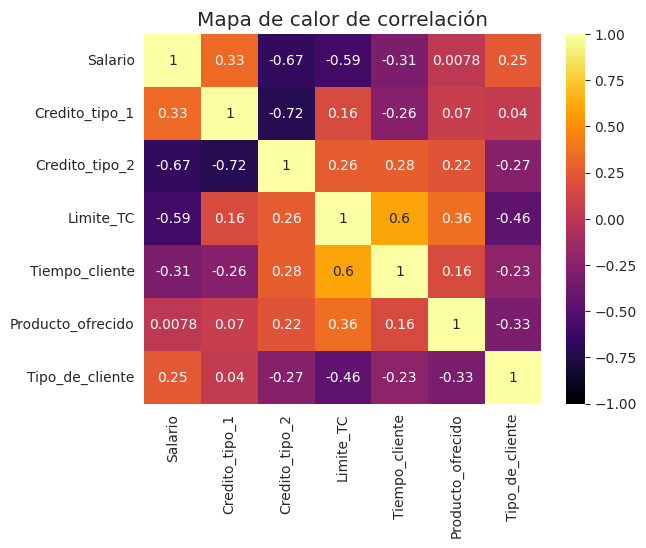

In [ ]:
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1 , cmap='inferno');
plt.title('Mapa de calor de correlación')
plt.show

In [ ]:
correlation_df2=df2.corr()
sorted_correlation= correlation_df2.unstack().sort_values(ascending=False)
sorted_correlation

,,0
Salario,Salario,1.000000
Credito_tipo_1,Credito_tipo_1,1.000000
Producto_ofrecido,Producto_ofrecido,1.000000
Tiempo_cliente,Tiempo_cliente,1.000000
Credito_tipo_2,Credito_tipo_2,1.000000
Limite_TC,Limite_TC,1.000000
Tipo_de_cliente,Tipo_de_cliente,1.000000
Tiempo_cliente,Limite_TC,0.600622
Limite_TC,Tiempo_cliente,0.600622
Producto_ofrecido,Limite_TC,0.356433


In [ ]:
df1= pd.read_csv ("/content/drive/MyDrive/UDD CIENCIAS DE DATOS/MODULO 4 MODELOS NO SUPERVISADOS/DATA/costumers.csv")
df1.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [ ]:
nuevos_datos= df2 = pd.read_csv("/content/drive/MyDrive/UDD CIENCIAS DE DATOS/MODULO 4 MODELOS NO SUPERVISADOS/DATA/new_costumer.csv")
nuevos_datos.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0


In [ ]:
nuevos_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            50 non-null     float64
 1   Credito_tipo_1     50 non-null     int64  
 2   Credito_tipo_2     50 non-null     int64  
 3   Limite_TC          50 non-null     float64
 4   Tiempo_cliente     50 non-null     float64
 5   Producto_ofrecido  50 non-null     int64  
 6   Tipo_de_cliente    50 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.9 KB


- CONCATENAR LOS 2 DF

In [ ]:
import pandas as pd
df1= pd.read_csv ("/content/drive/MyDrive/UDD CIENCIAS DE DATOS/MODULO 4 MODELOS NO SUPERVISADOS/DATA/costumers.csv")
df2 = pd.read_csv("/content/drive/MyDrive/UDD CIENCIAS DE DATOS/MODULO 4 MODELOS NO SUPERVISADOS/DATA/new_costumer.csv")
data = pd.concat([df1,df2], ignore_index=True)
data.to_csv("data.csv", index=False)
print("- Concatenados exitosamente")


- Concatenados exitosamente


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            550 non-null    float64
 1   Credito_tipo_1     550 non-null    int64  
 2   Credito_tipo_2     550 non-null    int64  
 3   Limite_TC          550 non-null    float64
 4   Tiempo_cliente     550 non-null    float64
 5   Producto_ofrecido  550 non-null    int64  
 6   Tipo_de_cliente    50 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 30.2 KB


In [ ]:
print(f"el porcentaje de completitud es: {data.count().sum() / df2.size * 100:.2f}%")

el porcentaje de completitud es: 957.14%


In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 500 to 549
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            50 non-null     float64
 1   Credito_tipo_1     50 non-null     int64  
 2   Credito_tipo_2     50 non-null     int64  
 3   Limite_TC          50 non-null     float64
 4   Tiempo_cliente     50 non-null     float64
 5   Producto_ofrecido  50 non-null     int64  
 6   Tipo_de_cliente    50 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 3.1 KB


In [ ]:
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
k = 3
neighbors_model = NearestNeighbors(n_neighbors=k)
neighbors_model.fit(data)
distances, indices = neighbors_model.kneighbors(data)
max_distances = distances[:,-1]
threshold = max_distances.mean() + 2 * max_distances.std()
outliers_indices  = data.index[max_distances > threshold]
data.drop(outliers_indices, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 500 to 549
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            48 non-null     float64
 1   Credito_tipo_1     48 non-null     int64  
 2   Credito_tipo_2     48 non-null     int64  
 3   Limite_TC          48 non-null     float64
 4   Tiempo_cliente     48 non-null     float64
 5   Producto_ofrecido  48 non-null     int64  
 6   Tipo_de_cliente    48 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 3.0 KB


In [ ]:
x = data[["Salario", "Credito_tipo_1", "Credito_tipo_2", "Limite_TC","Tiempo_cliente","Producto_ofrecido"]]
x.head(10)

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
500,19028.02,1,0,18845.91,0.0,1
501,17004.81,1,0,16421.36,0.0,0
502,12973.54,1,0,57295.44,9.6,1
503,13995.43,0,0,23556.17,7.7,0
504,13155.66,0,1,61073.59,10.2,1
505,4195.63,0,1,46424.81,0.0,1
506,9676.05,1,0,36202.91,0.0,0
507,3192.72,1,1,76851.08,6.4,1
508,7539.78,0,1,62530.44,11.3,1
509,7271.86,1,0,64016.47,5.3,0


In [ ]:
scaler= StandardScaler()
x[x.columns]= scaler.fit_transform(x[x.columns])
x.head(10)

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
500,1.048595,0.959166,-1.0,-1.056578,-0.742417,0.641689
501,0.672842,0.959166,-1.0,-1.187990,-0.742417,-1.558387
502,-0.075851,0.959166,-1.0,1.027403,1.673585,0.641689
503,0.113936,-1.042572,-1.0,-0.801280,1.195418,-1.558387
504,-0.042028,-1.042572,1.0,1.232181,1.824585,0.641689
505,-1.706097,-1.042572,1.0,0.438210,-0.742417,0.641689
506,-0.688265,0.959166,-1.0,-0.115821,-0.742417,-1.558387
507,-1.892359,0.959166,1.0,2.087327,0.868251,0.641689
508,-1.085017,-1.042572,1.0,1.311143,2.101419,0.641689
509,-1.134775,0.959166,-1.0,1.391686,0.591417,-1.558387


- PCA

In [ ]:
pca= PCA(n_components=2)
pca.fit(x)
x_pca= pca.transform(x)
x_pca

array([[-2.0463591 ,  0.20375619],
       [-2.17535272, -0.80302724],
       [ 0.19356451,  2.26036873],
       [-0.14174576, -0.87375605],
       [ 2.22053011,  0.85783286],
       [ 1.76984793, -0.68547012],
       [-1.11469583, -0.2583578 ],
       [ 2.20818725,  1.85539771],
       [ 2.87371864,  0.92801668],
       [ 0.16352354,  1.10574872],
       [ 1.73069867, -1.12003074],
       [ 0.59814055, -1.57909408],
       [ 1.33313937,  0.81729513],
       [-2.51795781,  0.1885453 ],
       [-1.71361188,  0.86639953],
       [-1.28538608,  0.97825986],
       [-1.09490044, -0.26134459],
       [ 0.50022612, -1.82132093],
       [-2.13918455,  0.6499386 ],
       [-2.16494972, -0.57784425],
       [ 1.27785505,  1.18634775],
       [-2.36995783,  0.44798178],
       [-2.64482635, -0.83889369],
       [ 0.33460757, -1.32976876],
       [-0.65659332, -1.54391249],
       [-0.36714905,  1.83706665],
       [ 2.35637298,  0.66403193],
       [ 0.09794511,  1.76082411],
       [ 0.39755149,

In [ ]:
len(x_pca)

48

In [ ]:
from sklearn.cluster import KMeans
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init="k-means++", max_iter=300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(x_pca)

In [ ]:
np.unique(y_kmeans, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([ 6, 16, 12, 14]))

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
cluster_labels = model.fit_predict(x_pca)
print("ETIQUETAS")
print(cluster_labels)

ETIQUETAS
[0 0 3 2 1 1 0 1 1 3 1 2 1 0 0 3 0 2 0 0 1 0 0 2 2 3 1 3 2 3 2 1 1 1 0 2 1
 1 0 2 0 1 3 0 2 1 1 0]


In [ ]:
df = pd.DataFrame(x_pca, columns=["Columna_1", "Columna_2"])
df["Cluster"] = cluster_labels
df.head(10)

,Columna_1,Columna_2,Cluster
0,-2.046359,0.203756,0
1,-2.175353,-0.803027,0
2,0.193565,2.260369,3
3,-0.141746,-0.873756,2
4,2.220530,0.857833,1
5,1.769848,-0.685470,1
6,-1.114696,-0.258358,0
7,2.208187,1.855398,1
8,2.873719,0.928017,1
9,0.163524,1.105749,3


In [ ]:
centers = model.cluster_centers_
center_coord = pd.DataFrame(centers)
center_coord

,0,1
0,-1.960181,0.134064
1,1.883870,0.309043
2,0.227188,-1.820210
3,-0.430157,1.606637


<Figure size 1600x1600 with 0 Axes>

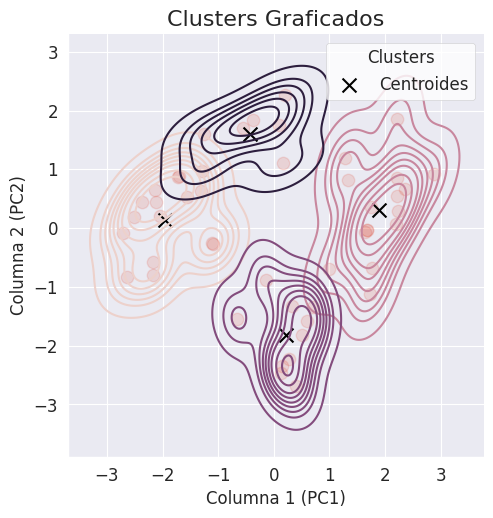

In [ ]:
plt.figure(figsize=(16,16))
sns.lmplot(data=df,x="Columna_1",y="Columna_2", fit_reg=False, scatter_kws={"alpha":0.15,"s":80})
sns.kdeplot(data=df, x= "Columna_1", y="Columna_2", hue="Cluster")
plt.scatter(center_coord[0],center_coord[1],s=100,marker="x",c="black",label="Centroides")
sns.set_style("whitegrid")
plt.title("Clusters Graficados",fontsize=16)
plt.xlabel("Columna 1 (PC1)", fontsize=12)
plt.ylabel("Columna 2 (PC2)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Clusters",fontsize=12, title_fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
print ("      SCORING PARA 4 CLUSTER    ")
print ("------------------------------------")
print ("/   Coeficiente    -    valor     /")
print ("------------------------------------")
silhouette_avg = silhouette_score(x_pca, y_kmeans, metric="euclidean")
print (f"Silhouette Score: {silhouette_avg}")
davies_bouldin_index = davies_bouldin_score(x_pca, y_kmeans)
print (f"Davies-Bouldin Index: {davies_bouldin_index}")
ch_score= calinski_harabasz_score(x_pca, y_kmeans)
print (f"Calinski-Harabasz Index: {ch_score}")

      SCORING PARA 4 CLUSTER    
------------------------------------
/   Coeficiente    -    valor     /
------------------------------------
Silhouette Score: 0.5453674343203687
Davies-Bouldin Index: 0.5498145989628513
Calinski-Harabasz Index: 88.79926398514085


# Métricas de las Clusters

**Índice de Silueta:** 0.5453674343203687

**Índice de Davies-Bouldin:** 0.5498145989628513

**Índice de Calinski-Harabasz:** 88.79926398514085

- **Interpretación:**

**Índice de Silueta:** Un valor de 0.54 señala que, en general, los puntos datos están bien asignados a sus respectivos clusters. Sin embargo, podrían existir algunos puntos que estén en el límite entre dos clusters o que estén peor asignados.

**Índice de Davies-Bouldin:**Un valor de 0.54 indica que los clusters están bien separados pero podría existir algunos pares de clusters más similares de aquellos.

**Índice de Calinski-Harabasz:** Un valor de 88.79 señala que los clusters están bien separados en relación a la variación que existe entre los clusters respecto a la variación que existe dentro de cada cluster.
Conclusión General:

- A partir de estos índices, podemos concluir que el algoritmo de agrupación ha hecho un trabajo bastante aceptable en identificar grupos en sus datos. En general los clusters son compáctos y relativamente bien separados. Hay margen, desde luego, pero también existen requisitos que son dados por los índices seleccionados.

**Recomendaciones**

- **Productos y Servicios Personalizados:** Adaptar la oferta de productos y servicios a las necesidades específicas de cada segmento.

- **Comunicación Dirigida:** Diseñar campañas de marketing personalizadas para cada segmento.

- **Experiencia del Cliente Personalizada:** Ofrecer una experiencia de cliente única para cada segmento.